This notebook compares the outliers detected in the Kepler Sparse dataset compared to the Dense dataset. Conclusion is that 96/100 of the same light curves were found to be outliers in both sets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# importing data
#

dataSparse = np.load('data/KeplerSampleWErrSparse.npy')
dataDense = np.load('data/KeplerSampleWErr.npy')

In [19]:
print(dataDense.shape)
print(dataDense[:500,1,:].shape)

(2500, 3, 100)
(500, 100)


In [3]:
rng = np.random.RandomState(42)

# using first 500 objects to train
clf_sparse = IsolationForest(max_samples=500, random_state=rng)
clf_sparse.fit(dataSparse[:500,1,:])

clf_dense = IsolationForest(max_samples=500, random_state=rng)
clf_dense.fit(dataDense[:500,1,:])

#identify outliers in 2000 test set
data_test_sparse = dataSparse[500:]
data_test_dense = dataDense[500:]
scores_dense = clf_dense.decision_function(data_test_dense[:,1,:])
scores_sparse = clf_sparse.decision_function(data_test_sparse[:,1,:])

In [15]:
outlier_idxs_test_dense = np.argsort(scores_dense)[:100]
outlier_idxs_dense = outlier_idxs_test_dense + 500
outlier_idxs_test_sparse = np.argsort(scores_sparse)[:100]
outlier_idxs_sparse = outlier_idxs_test_sparse + 500 
print(outlier_idxs_dense)

outlier_twice=list(set(outlier_idxs_dense) & set(outlier_idxs_sparse))
print(len(outlier_twice))
#print(np.sort(outlier_idxs_dense))
#print(np.sort(outlier_idxs_sparse))

[ 635  511 2091  696 2237 2082 1817 1973  904 1596 1133 2396 1145 1778 2388
 2425 1781 2382 1352 1511 1148 1384 1851 2069 1773 2338 1108 1053 1684 2126
 2264 2427 1948  678 1939 2234 2000 2202 1091 2499 1274  585 1950 1469 2163
 2032 1327 2183 1136 1793 1229 1183 1551 2119 2402 1258 1470  974 1193 2436
 1560 1984 2118  900  897 1250 1671 1043 2333 1318 2341 2147 1386  619 2026
  611  722 1068  882  579 1135 1452 1419 1303  569 2031 1946 1266 1544 2045
 1755 1016  858  867 2416 1421  723 1933  625 2088]
96


In [5]:
#identify light curves found as outlier in either sparse or dense but not both
outlier_once=list(set(outlier_idxs_dense) ^ set(outlier_idxs_sparse))
print(len(outlier_once))
#print(np.sort(outlier_once))

8


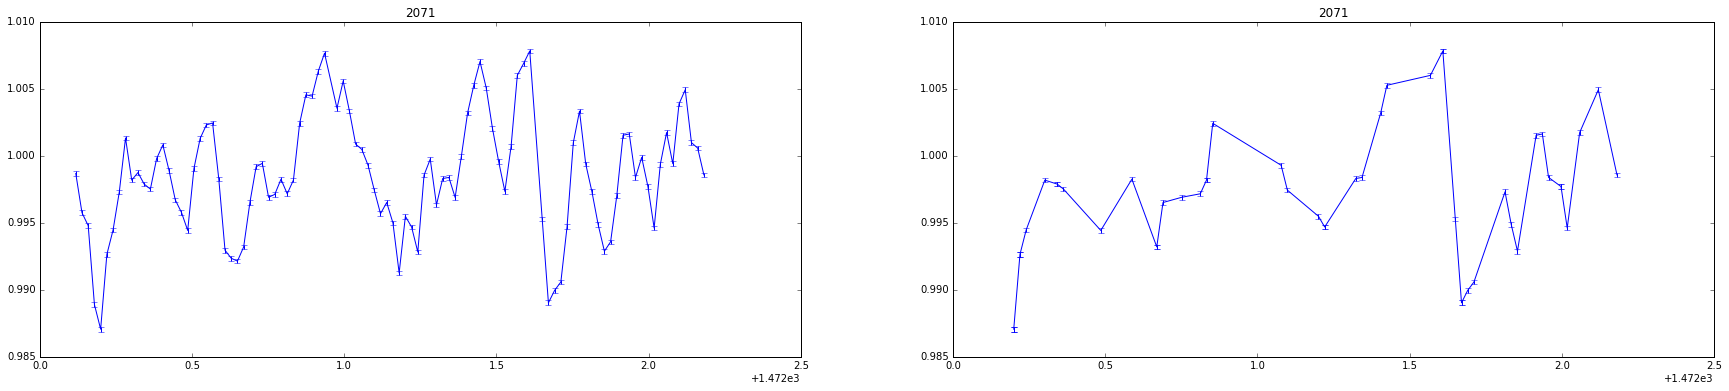

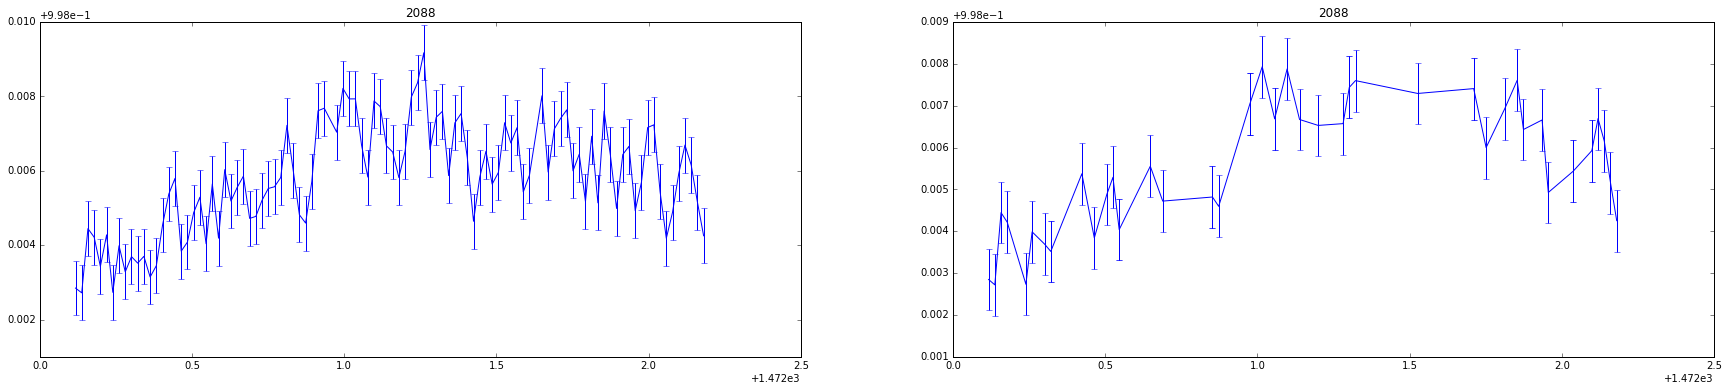

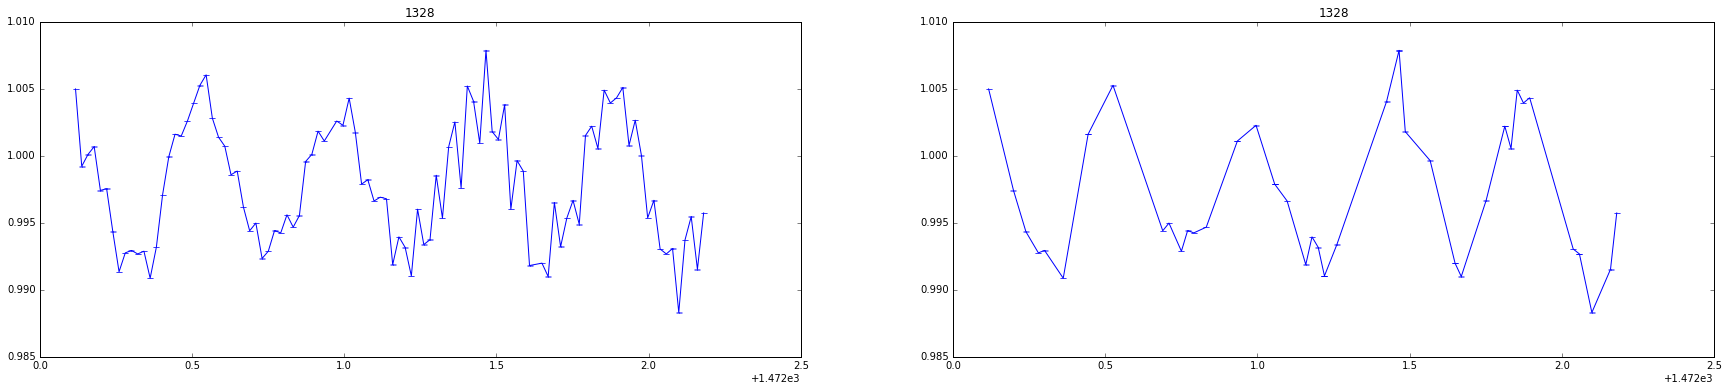

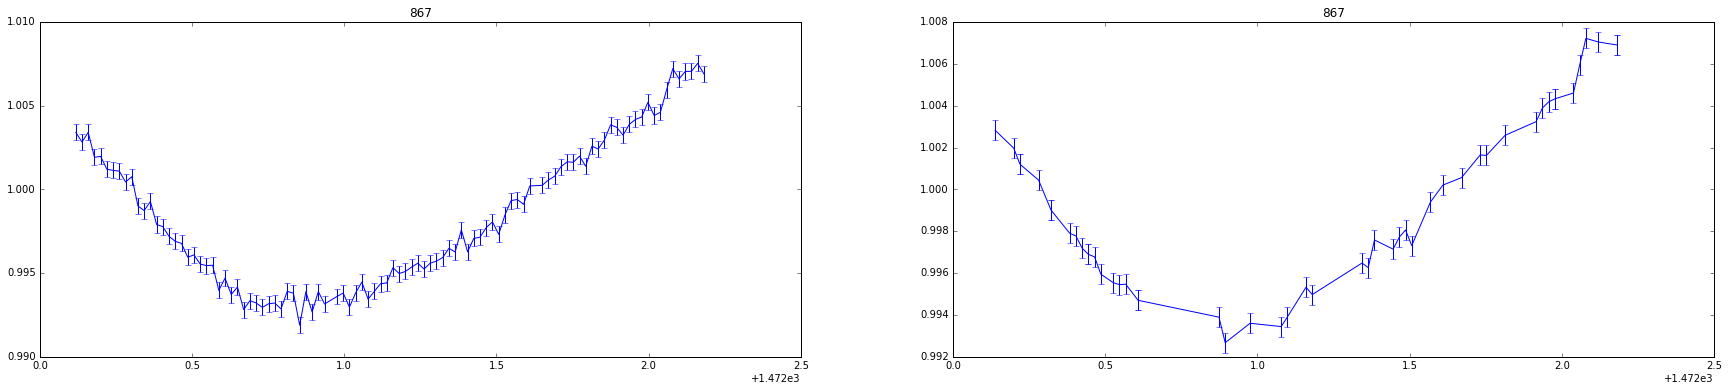

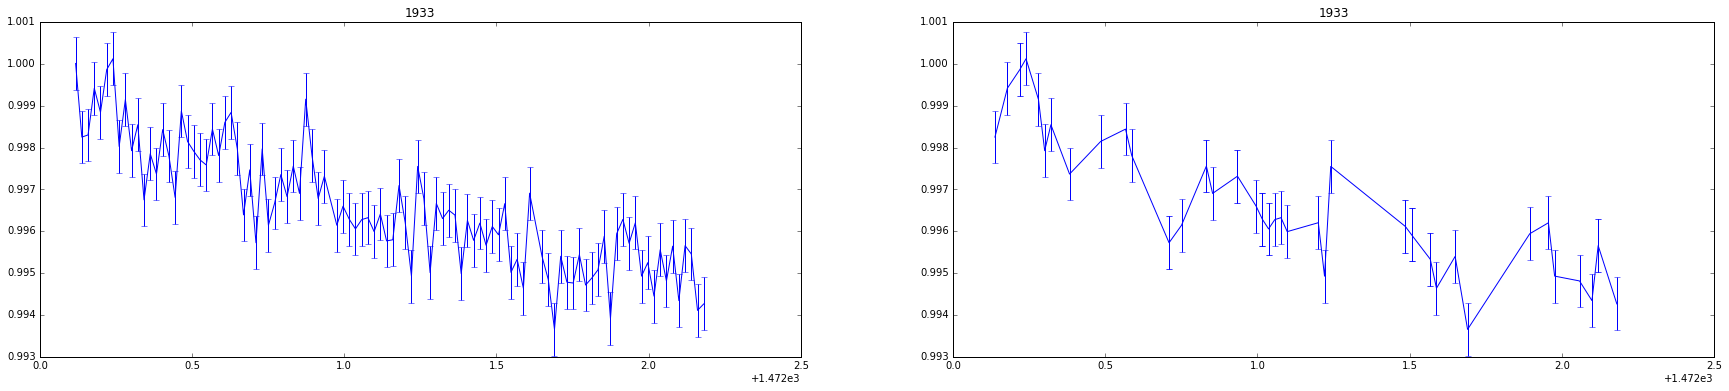

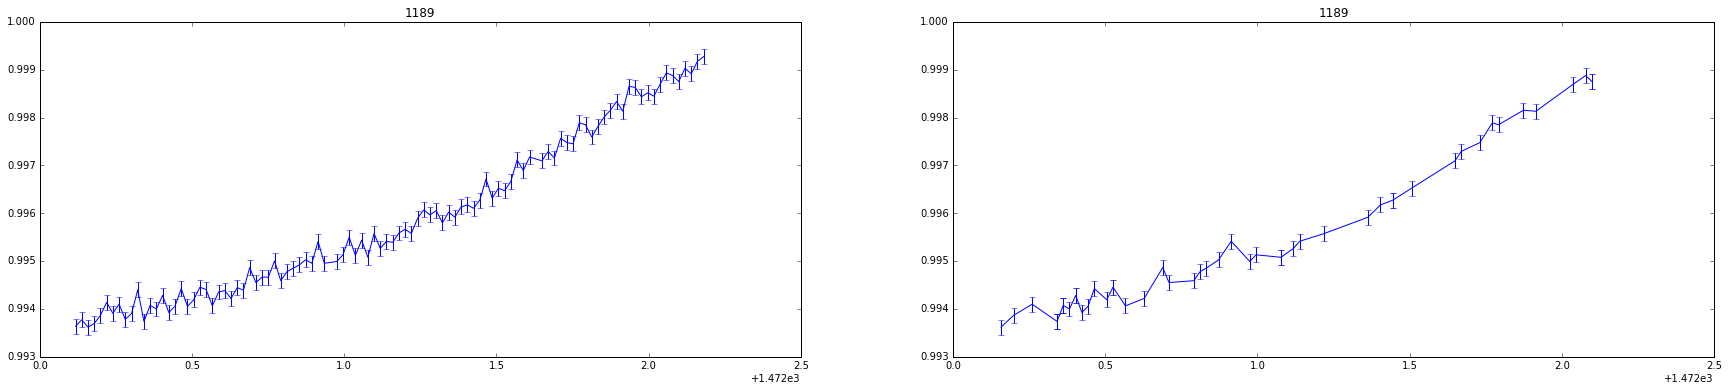

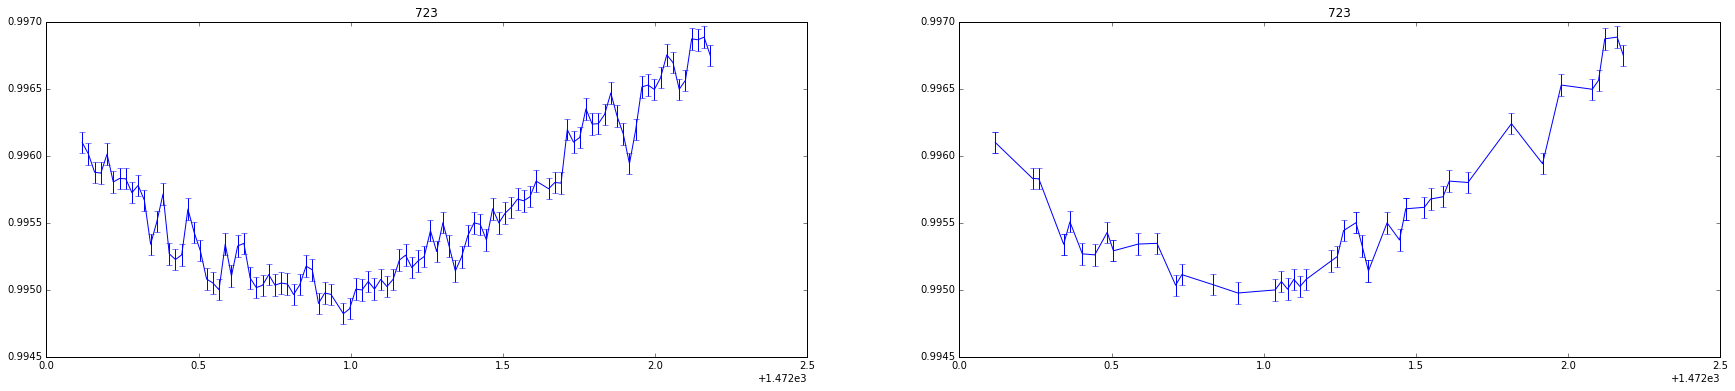

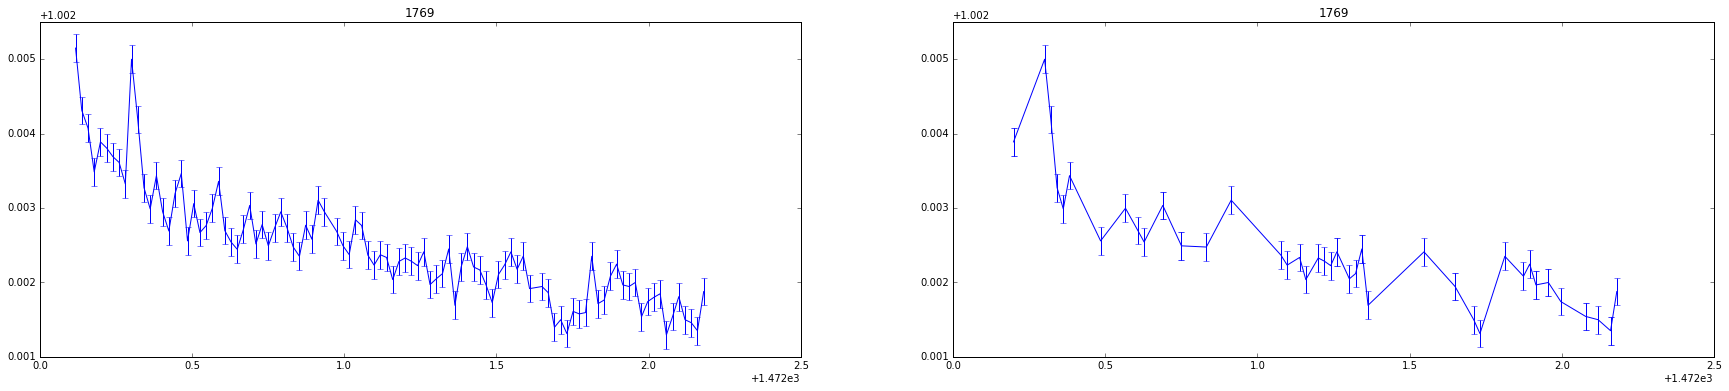

In [6]:
#visualize the light curves found in one but not the other
for i,ex in enumerate(outlier_once):
    f, (ax0, ax1) = plt.subplots(1, 2, figsize=(30, 6))
    ax0.errorbar(dataDense[ex,0,:], dataDense[ex,1,:], dataDense[ex,2,:])
    ax0.set_title(ex)
    ax1.errorbar(dataSparse[ex,0,:], dataSparse[ex,1,:], dataSparse[ex,2,:])
    ax1.set_title(ex)
    plt.show()